In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn import datasets
from sklearn.metrics import mean_squared_error
from sklearn import ensemble


from sklearn.preprocessing import StandardScaler, LabelEncoder

import seaborn as sns

from sklearn.metrics import mean_squared_error, r2_score

from sklearn.model_selection import cross_val_predict

In [2]:
data= pd.read_csv('~/downloads/winequality-red.csv', sep=';')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [3]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
bins=(2,5,8) 
grp=['bad','good']

data['quality']=pd.cut(data['quality'],bins= bins , labels= grp) 

data['quality'].unique()

[bad, good]
Categories (2, object): [bad < good]

In [5]:
label_quality=LabelEncoder()

In [6]:
data['quality']=label_quality.fit_transform(data['quality'])
data['quality'].head()

0    0
1    0
2    0
3    1
4    0
Name: quality, dtype: int64

In [7]:
data['quality'].value_counts()

1    855
0    744
Name: quality, dtype: int64

In [8]:
X = data.iloc[:,:-1]

y = data.iloc[:,-1]

In [9]:
x_training_set, x_test_set, y_training_set, y_test_set = train_test_split(X,y,test_size=0.10,random_state=42,
                                                                          shuffle=True)

In [10]:
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,'learning_rate': 0.01, 'loss': 'ls'}
model = ensemble.GradientBoostingRegressor(**params)
model.fit(x_training_set, y_training_set)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='ls', max_depth=4, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=500, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [11]:
model_score = model.score(x_training_set,y_training_set)
print('R2 sq: ',model_score)

R2 sq:  0.5894893827896115


In [12]:
y_predicted = model.predict(x_test_set)
print("Mean squared error: %.2f"% mean_squared_error(y_test_set, y_predicted))
print('Test Variance score: %.2f' % r2_score(y_test_set, y_predicted))

Mean squared error: 0.15
Test Variance score: 0.41


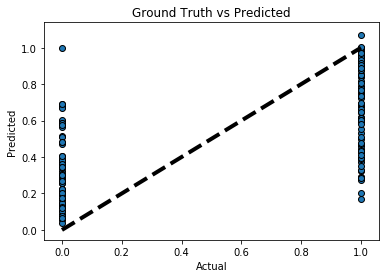

In [13]:
fig, ax = plt.subplots()
ax.scatter(y_test_set, y_predicted, edgecolors=(0, 0, 0))
ax.plot([y_test_set.min(), y_test_set.max()], [y_test_set.min(), y_test_set.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Ground Truth vs Predicted")
plt.show()